# Introduction

There are variety of fruits around the world. A date is a stone fruit, meaning it has a single seed surrounded by an outer fleshy fruit. They're grown on date palm trees, mostly found in dry areas. 

Dates are of many types. Each of them having their own benefits. In this project, a few of date fruit breeds are described. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. 

The aim of this is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using three different machine learning methods.

__Fun Fact:__ I have used ChatGPT in some parts of the code.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


# Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import OrderedDict
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score


import warnings
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_excel("/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [4]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [5]:
df.shape

(898, 35)

In [6]:
df.isnull().sum().sum()

0

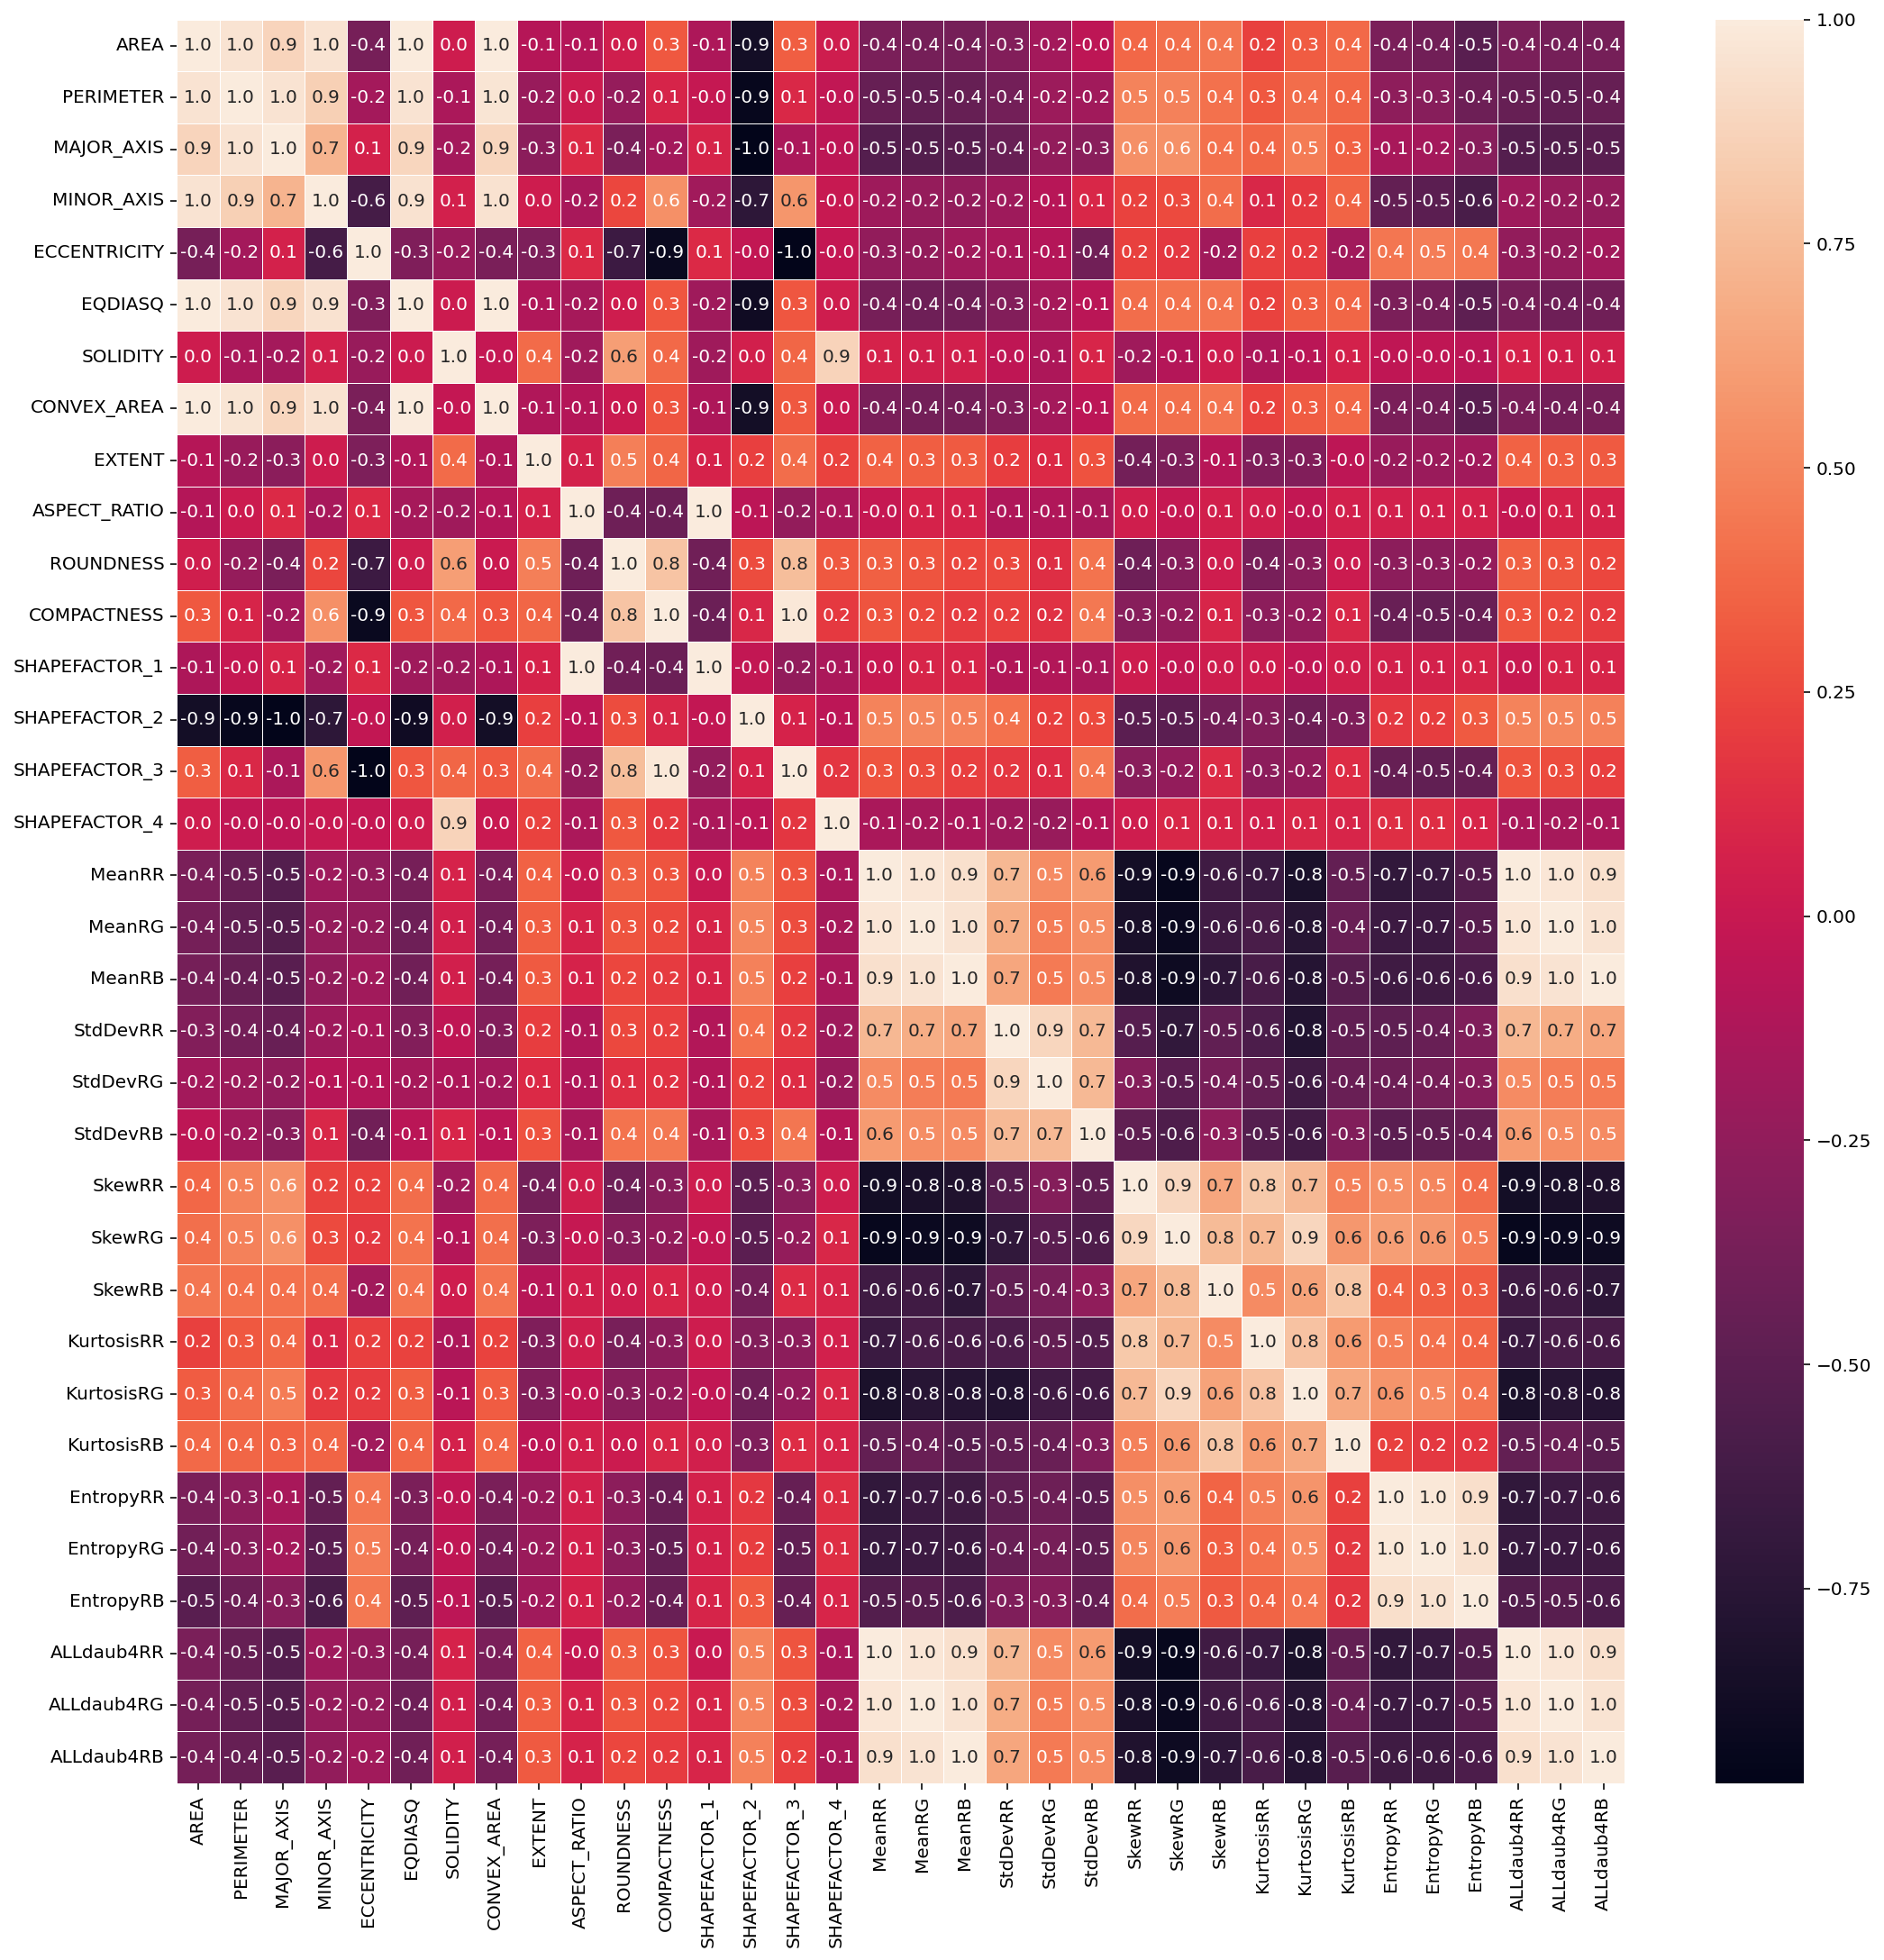

In [7]:
fig,ax = plt.subplots(figsize=(18, 18))
axes = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [8]:
df['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

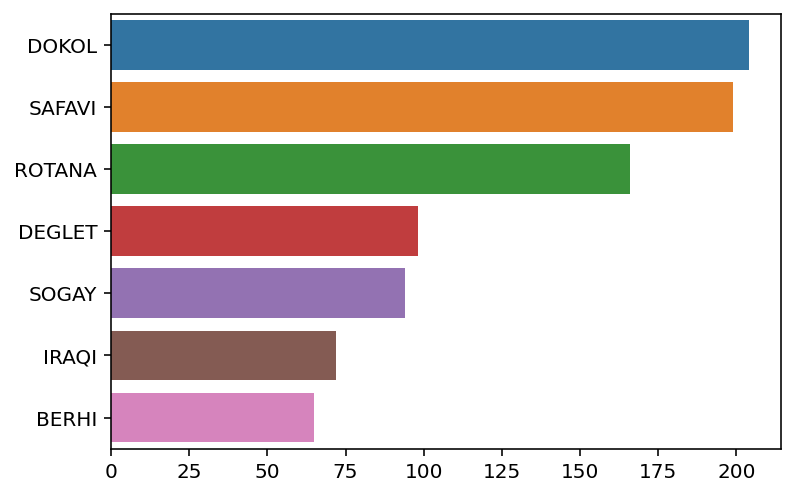

In [9]:
sns.barplot(y=df["Class"].value_counts().index,x=df["Class"].value_counts().values);

<AxesSubplot:xlabel='AREA', ylabel='PERIMETER'>

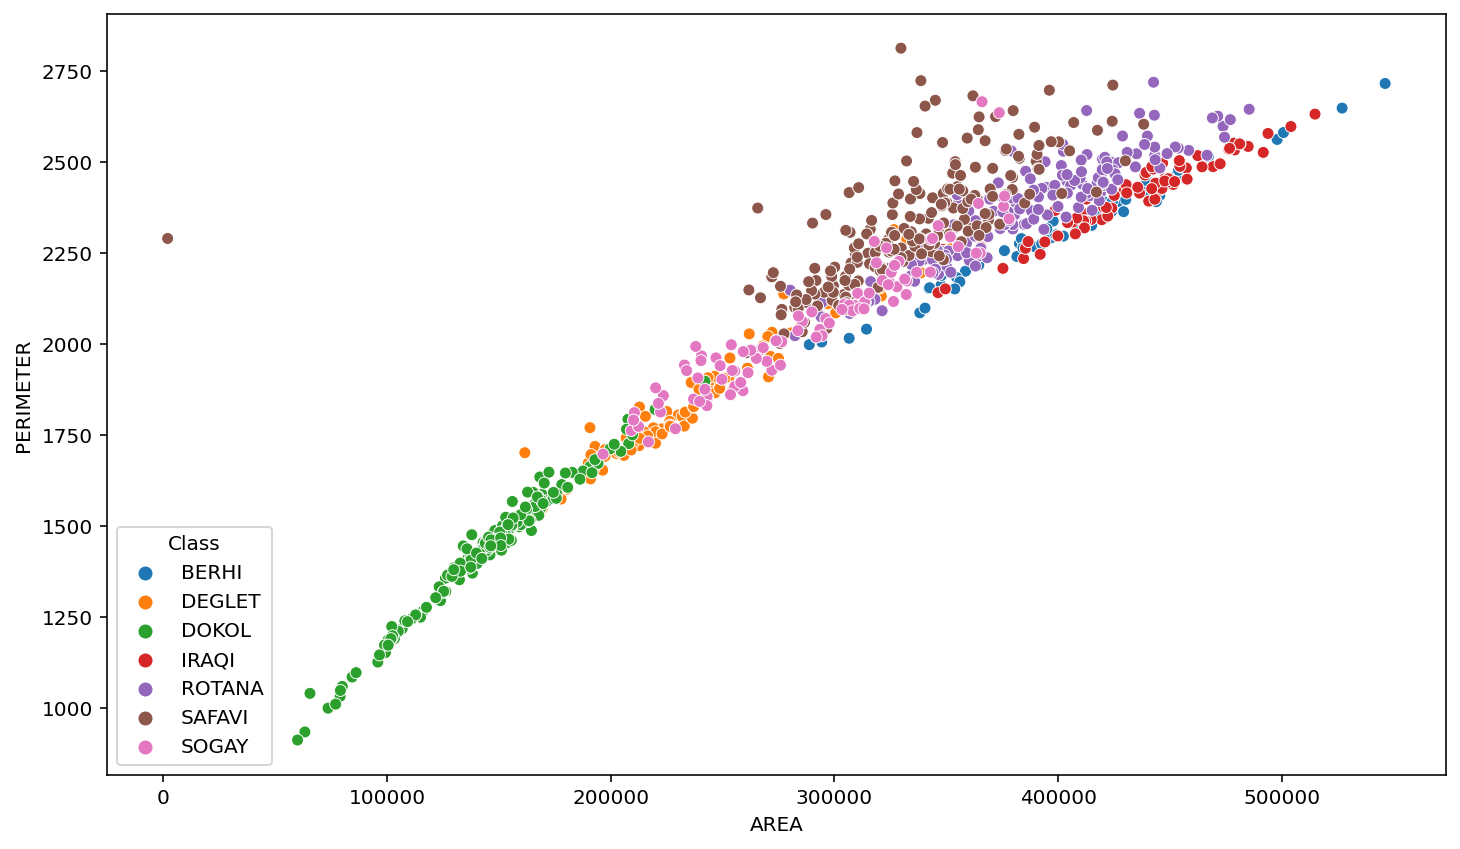

In [10]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="PERIMETER", hue='Class', data= df)

<AxesSubplot:>

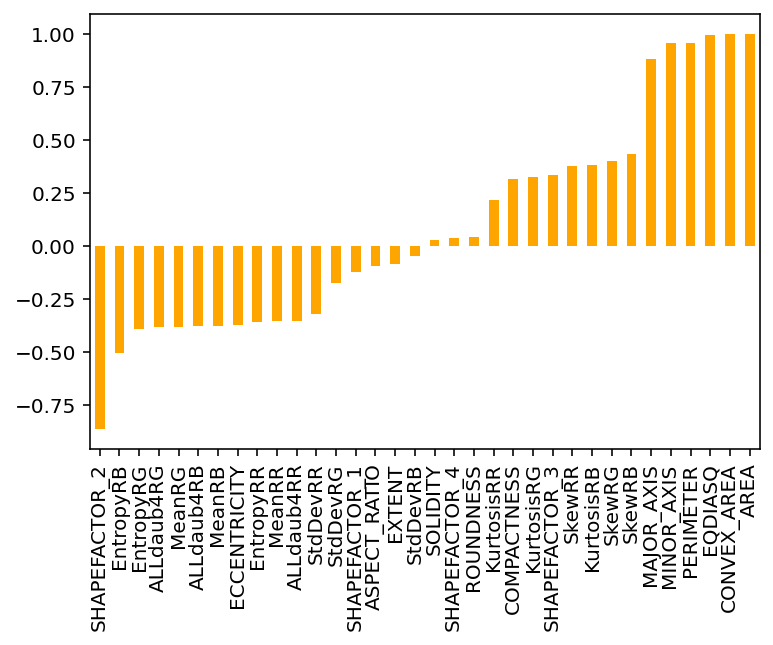

In [11]:
df.corr()['AREA'].sort_values().plot(kind="bar", color='orange')

<AxesSubplot:xlabel='AREA', ylabel='Class'>

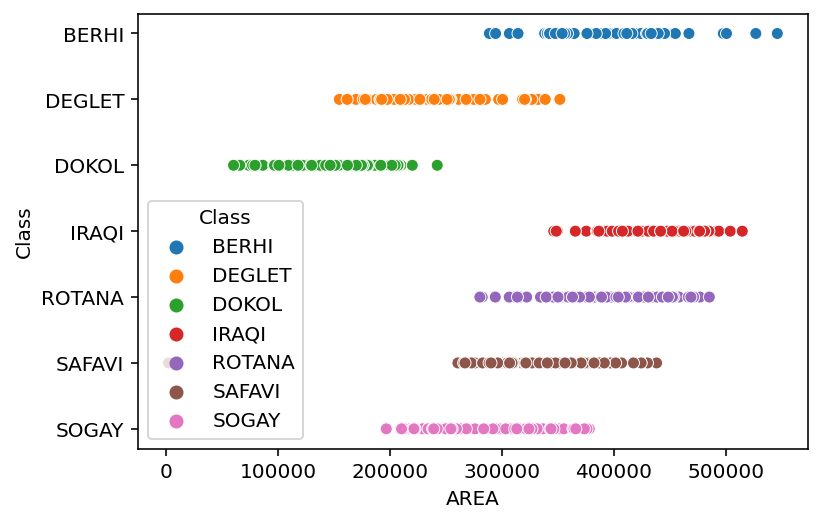

In [13]:
sns.scatterplot(x='AREA',y='Class',hue='Class',data=df)

<AxesSubplot:xlabel='PERIMETER', ylabel='Class'>

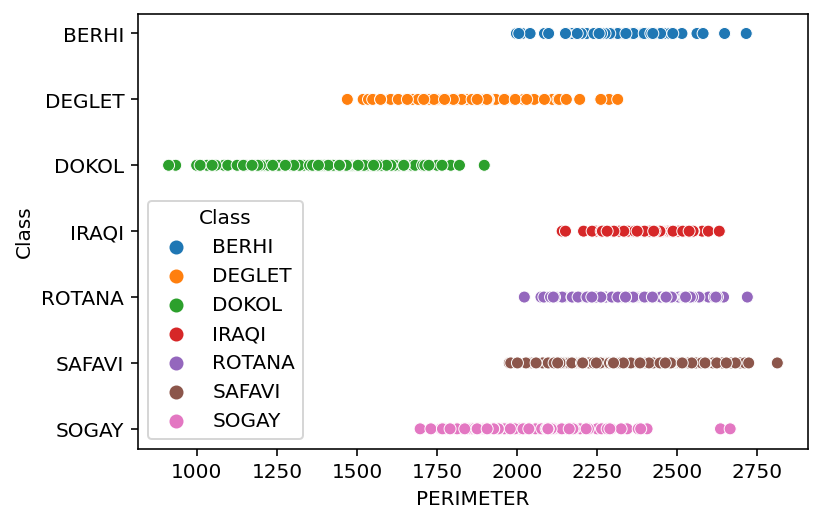

In [14]:
sns.scatterplot(x='PERIMETER',y='Class',hue='Class',data=df)

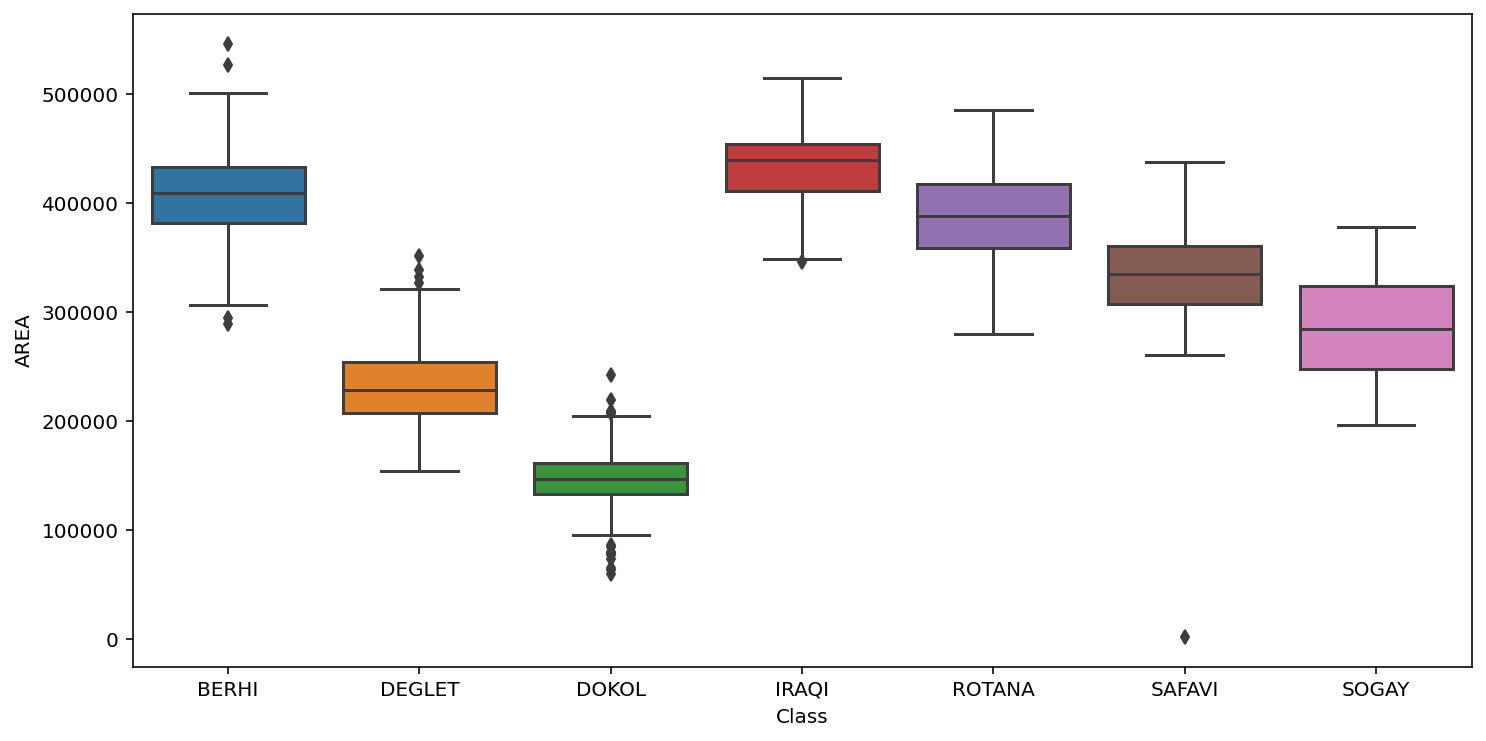

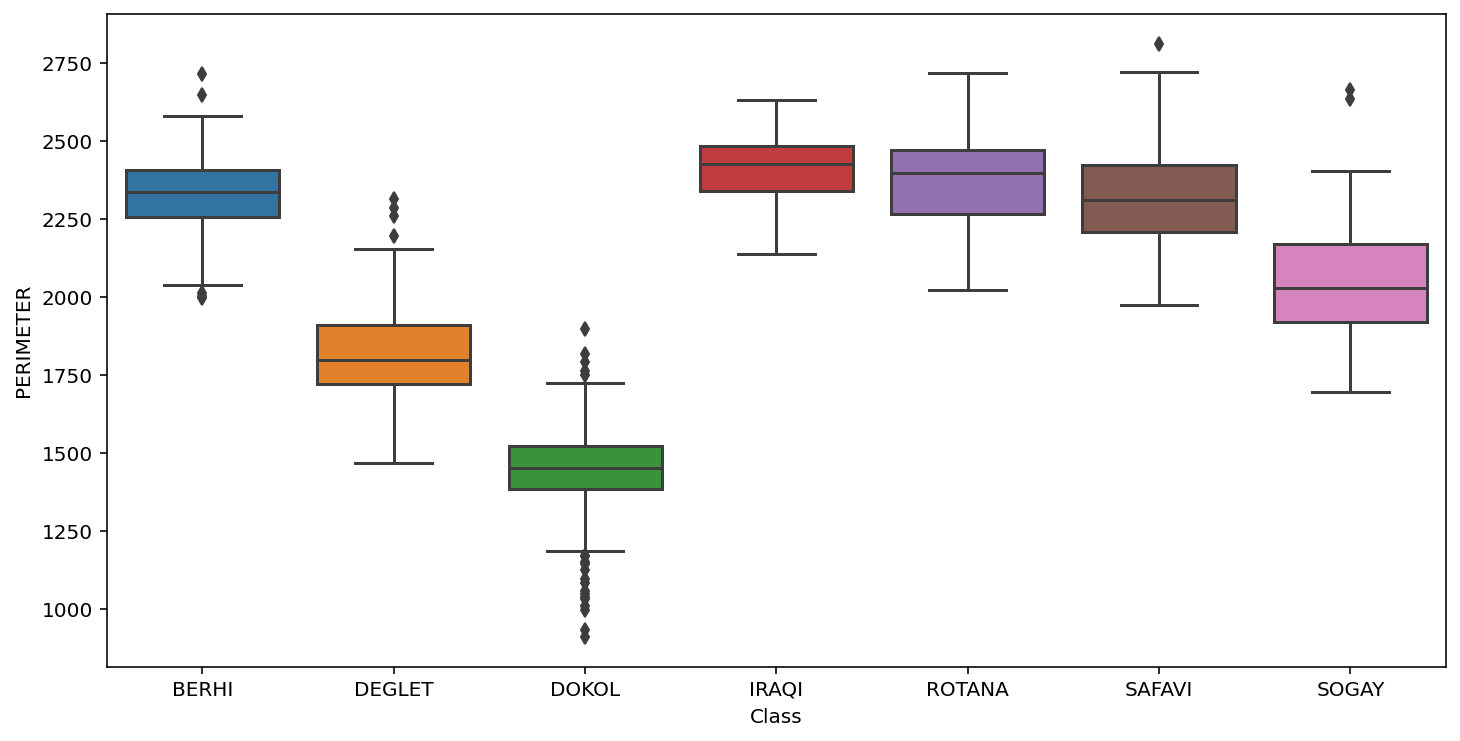

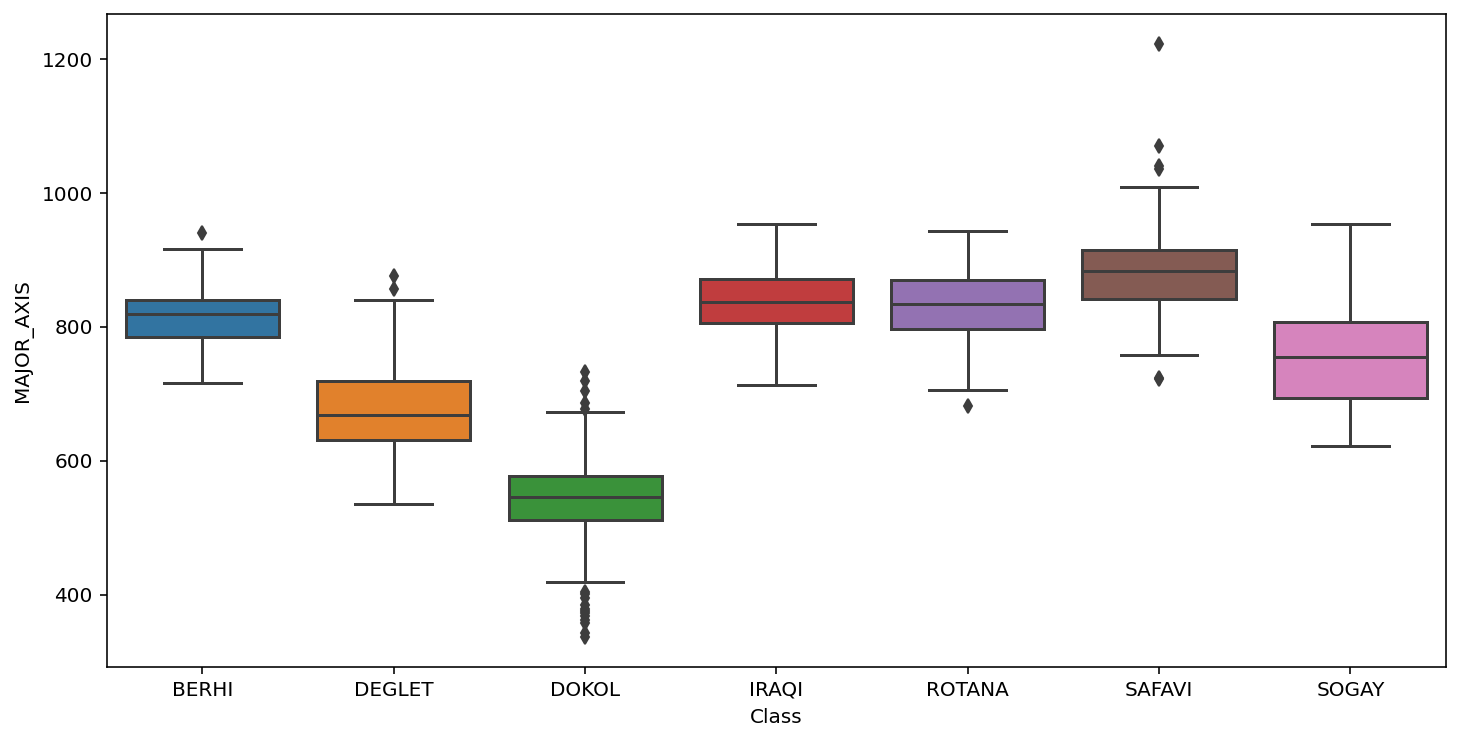

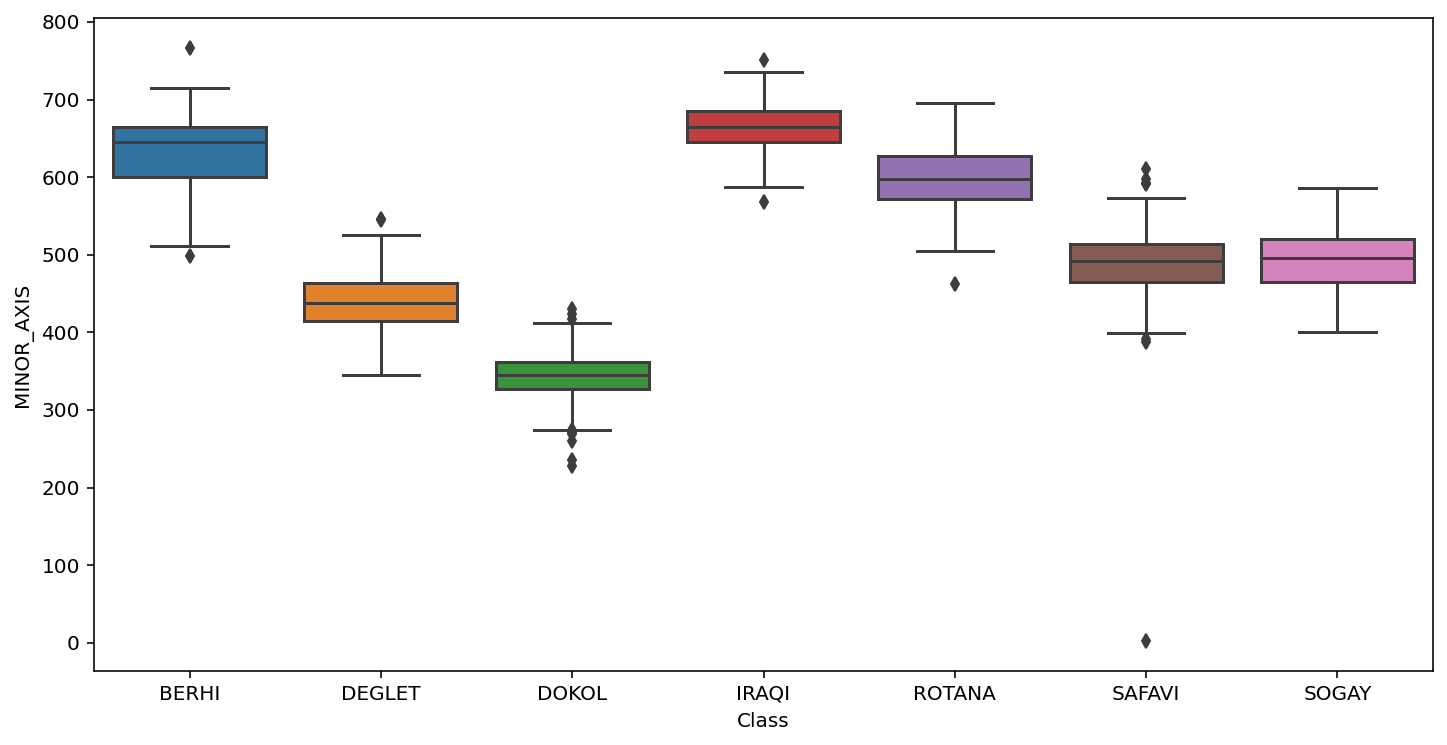

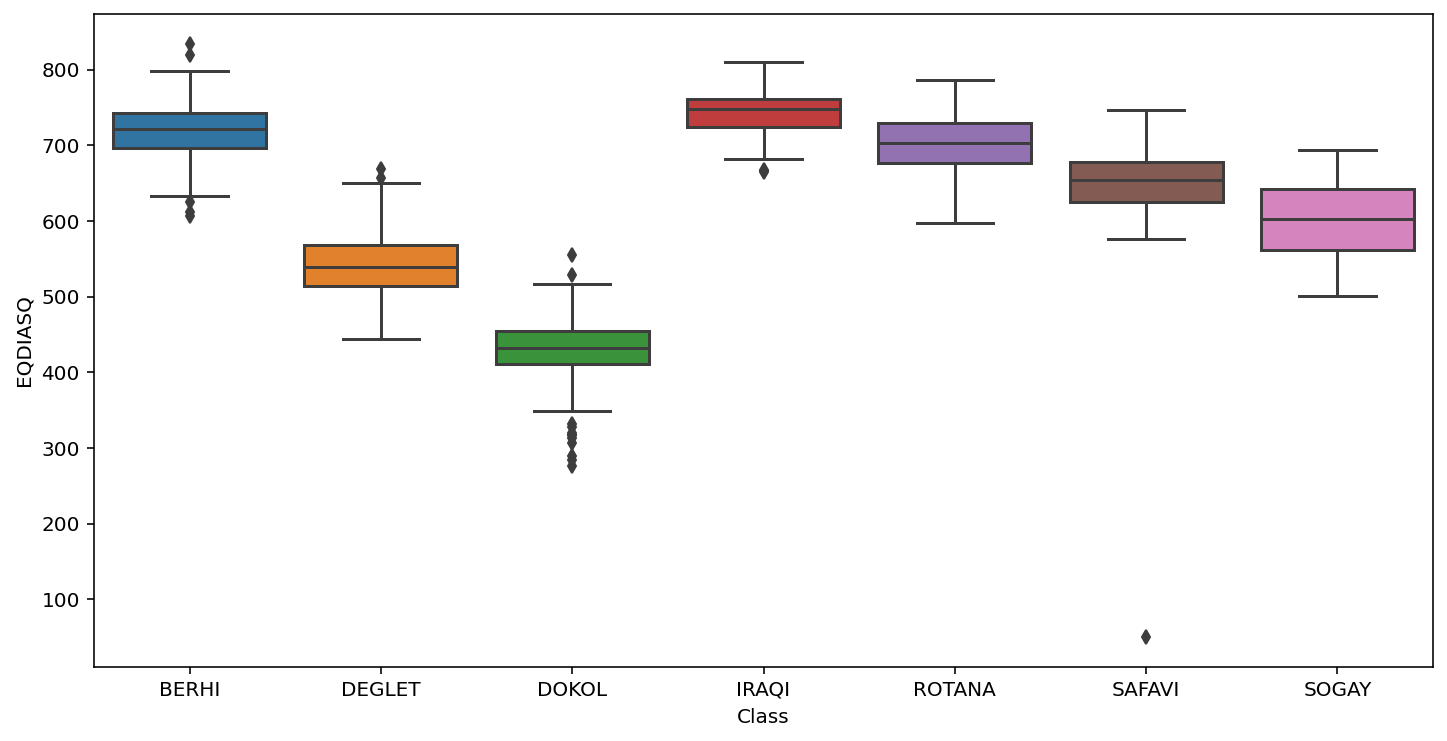

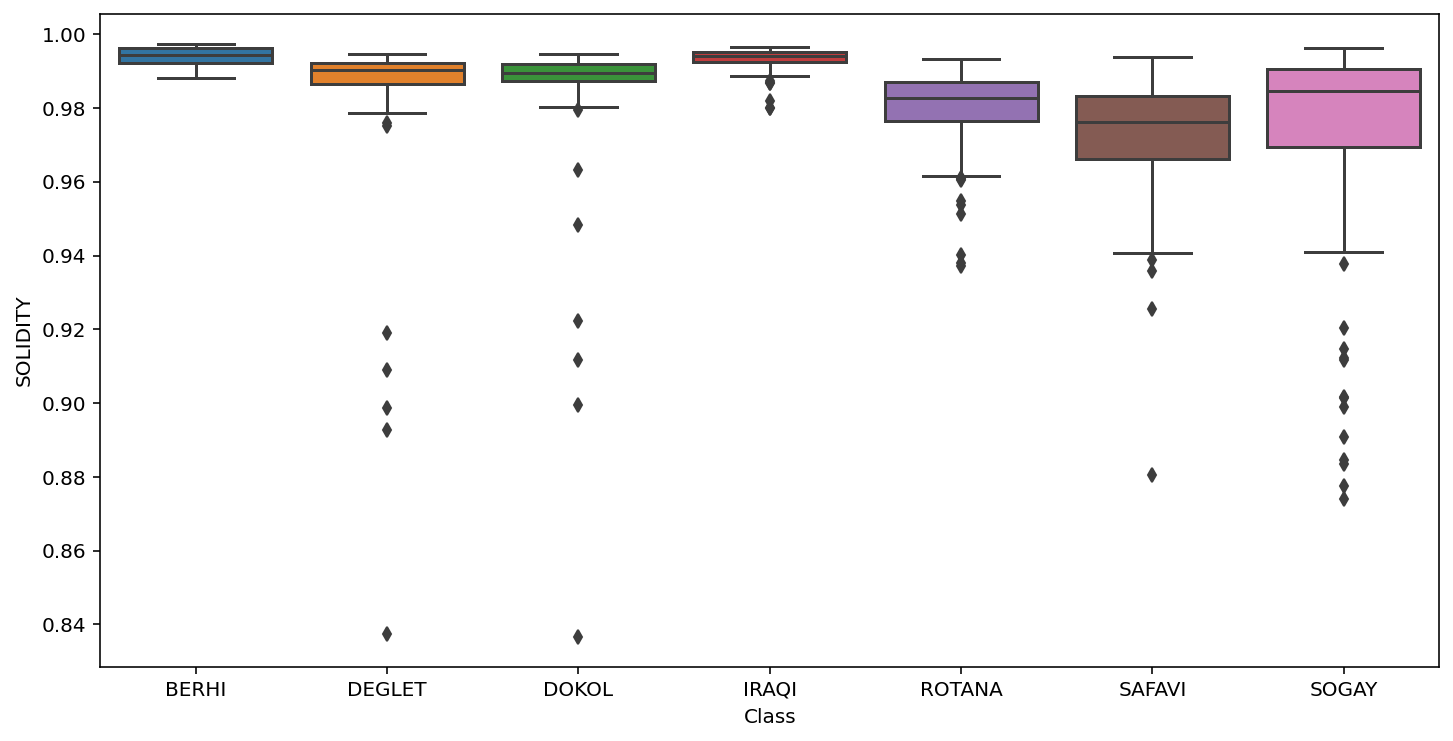

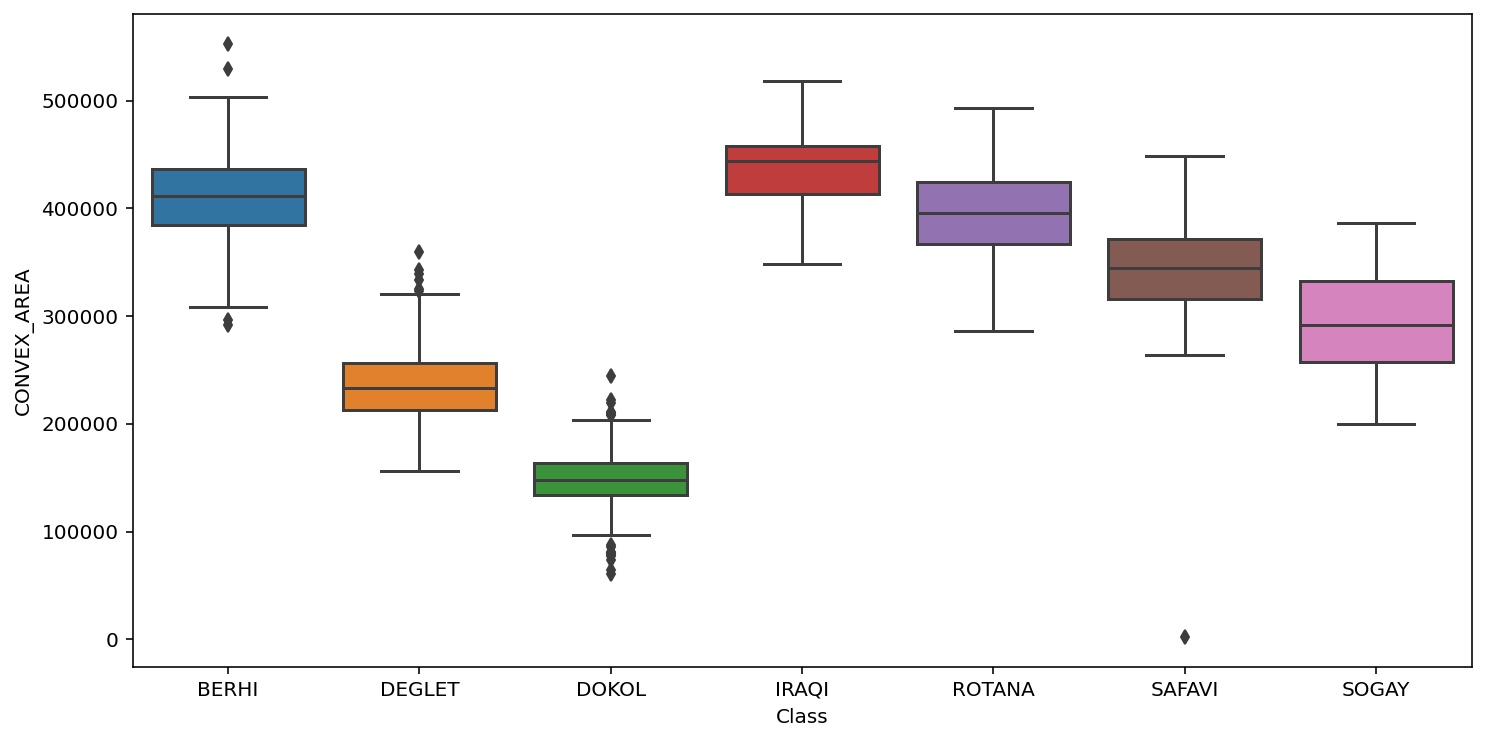

In [15]:
#Printing boxplot in one plot based on the following features
feat = ["AREA","PERIMETER","MAJOR_AXIS","MINOR_AXIS","EQDIASQ","SOLIDITY", "CONVEX_AREA"]
for feature in feat: 
    plt.figure(figsize=(12,6))
    sns.boxplot(x="Class", y=feature, data=df)
    plt.show()

## Preprocessing

In [17]:
X = df.drop("Class",axis=1)
y = df['Class']
X.shape

(898, 34)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    #random_state=1,
                                                    shuffle=True)

In [19]:
print(f"""
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape}
""")


X_train shape: (673, 34)
X_test shape: (225, 34)
y_train shape: (673,)
y_test shape: (225,)



# Model

## Logistic Regression

In [20]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [21]:
accuracy = logreg.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5511111111111111


In [22]:
print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        43
      DEGLET       0.00      0.00      0.00        69
       DOKOL       0.69      0.40      0.51       155
       IRAQI       0.53      0.50      0.51        58
      ROTANA       0.37      0.90      0.53       126
      SAFAVI       0.87      0.89      0.88       148
       SOGAY       0.55      0.53      0.54        74

    accuracy                           0.56       673
   macro avg       0.43      0.46      0.42       673
weighted avg       0.53      0.56      0.51       673



              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        22
      DEGLET       0.00      0.00      0.00        29
       DOKOL       0.61      0.45      0.52        49
       IRAQI       0.35      0.43      0.39        14
      ROTANA       0.37      0.93      0.53        40
      SAFAVI       0.92      0.94      0.93        51
       SOGAY       0.52      0.55      0.54        20

    accuracy                           0.55       225
   macro avg       0.40      0.47      0.42       225
weighted avg       0.48      0.55      0.49       225



<AxesSubplot:>

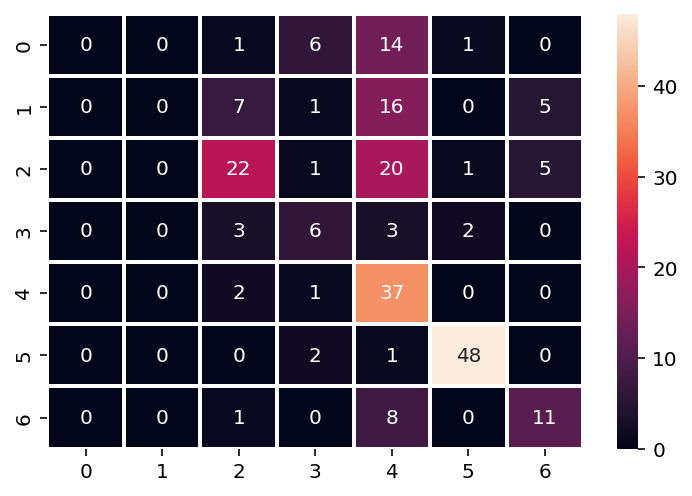

In [23]:
print(classification_report(y_test, logreg.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2,linecolor='white')

In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  0,  1,  6, 14,  1,  0],
       [ 0,  0,  7,  1, 16,  0,  5],
       [ 0,  0, 22,  1, 20,  1,  5],
       [ 0,  0,  3,  6,  3,  2,  0],
       [ 0,  0,  2,  1, 37,  0,  0],
       [ 0,  0,  0,  2,  1, 48,  0],
       [ 0,  0,  1,  0,  8,  0, 11]])

              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        22
      DEGLET       0.00      0.00      0.00        29
       DOKOL       0.61      0.45      0.52        49
       IRAQI       0.35      0.43      0.39        14
      ROTANA       0.37      0.93      0.53        40
      SAFAVI       0.92      0.94      0.93        51
       SOGAY       0.52      0.55      0.54        20

    accuracy                           0.55       225
   macro avg       0.40      0.47      0.42       225
weighted avg       0.48      0.55      0.49       225



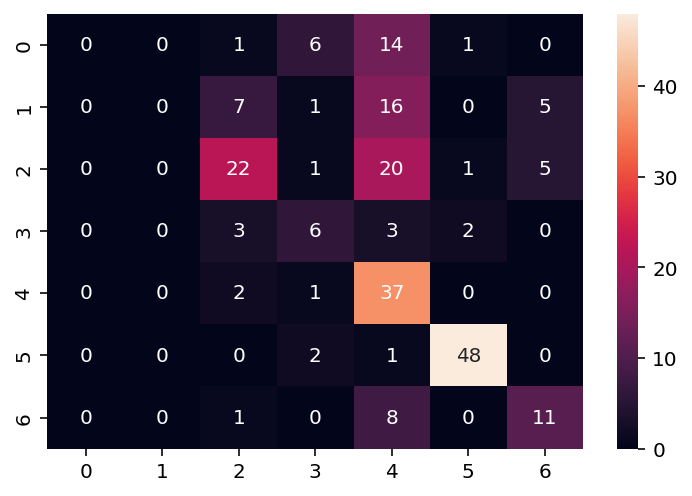

In [25]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[200,300,400,500,700,1200,1500]}
log=RandomizedSearchCV(LogisticRegression(),param_grid)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
sns.heatmap(confusion_log,annot=True)
print(classification_report(y_test,y_pred_log))

In [26]:
y_pred[:5]

array(['SAFAVI', 'ROTANA', 'ROTANA', 'SOGAY', 'ROTANA'], dtype=object)

## Hyperparameter Tuning

In [27]:
# Create a logistic regression model
log_reg = LogisticRegression()

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization coefficient
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Optimization algorithm
    'max_iter':[200,300,400,500,700,1200,1500]
}

# Create a GridSearchCV object to search the hyperparameter grid
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'C': 1, 'max_iter': 200, 'solver': 'saga'}


In [28]:
log_reg = LogisticRegression(max_iter = grid_search.best_params_["max_iter"],
                          C = grid_search.best_params_["C"])
log_reg.fit(X_train, y_train)

train_pred = log_reg.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)
print('Train Accuracy: ', train_acc)
 
test_pred = log_reg.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)
print('Test Accuracy:', test_acc)

print(classification_report(y_train, log_reg.predict(X_train)))

Train Accuracy:  0.5586924219910847
Test Accuracy: 0.5511111111111111
              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        43
      DEGLET       0.00      0.00      0.00        69
       DOKOL       0.70      0.40      0.51       155
       IRAQI       0.54      0.52      0.53        58
      ROTANA       0.37      0.90      0.53       126
      SAFAVI       0.87      0.89      0.88       148
       SOGAY       0.55      0.53      0.54        74

    accuracy                           0.56       673
   macro avg       0.43      0.46      0.43       673
weighted avg       0.53      0.56      0.51       673



## KNN

In [29]:
# create a KNN model with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# fit the model to the training data
knn.fit(X_train, y_train)

# use the model to make predictions on the testing data
ky_pred = knn.predict(X_test)

In [30]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

       BERHI       0.40      0.23      0.29        43
      DEGLET       0.62      0.48      0.54        69
       DOKOL       0.70      0.89      0.79       155
       IRAQI       0.71      0.55      0.62        58
      ROTANA       0.79      0.94      0.86       126
      SAFAVI       0.93      0.93      0.93       148
       SOGAY       0.74      0.54      0.62        74

    accuracy                           0.76       673
   macro avg       0.70      0.65      0.67       673
weighted avg       0.75      0.76      0.74       673



              precision    recall  f1-score   support

       BERHI       0.22      0.09      0.13        22
      DEGLET       0.45      0.31      0.37        29
       DOKOL       0.64      0.84      0.73        49
       IRAQI       0.54      0.50      0.52        14
      ROTANA       0.69      0.93      0.79        40
      SAFAVI       0.96      0.98      0.97        51
       SOGAY       0.46      0.30      0.36        20

    accuracy                           0.68       225
   macro avg       0.57      0.56      0.55       225
weighted avg       0.63      0.68      0.64       225



<AxesSubplot:>

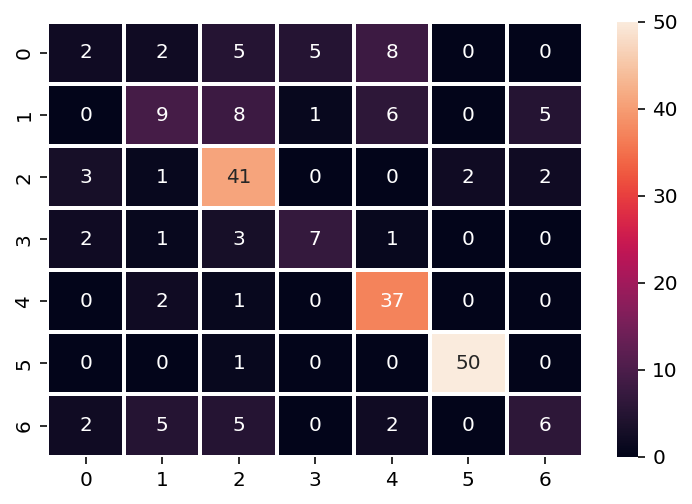

In [31]:
print(classification_report(y_test, knn.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,ky_pred),annot=True,linewidths=2,linecolor='white')

In [32]:
ky_pred[:5]

array(['SAFAVI', 'BERHI', 'BERHI', 'SOGAY', 'DEGLET'], dtype=object)

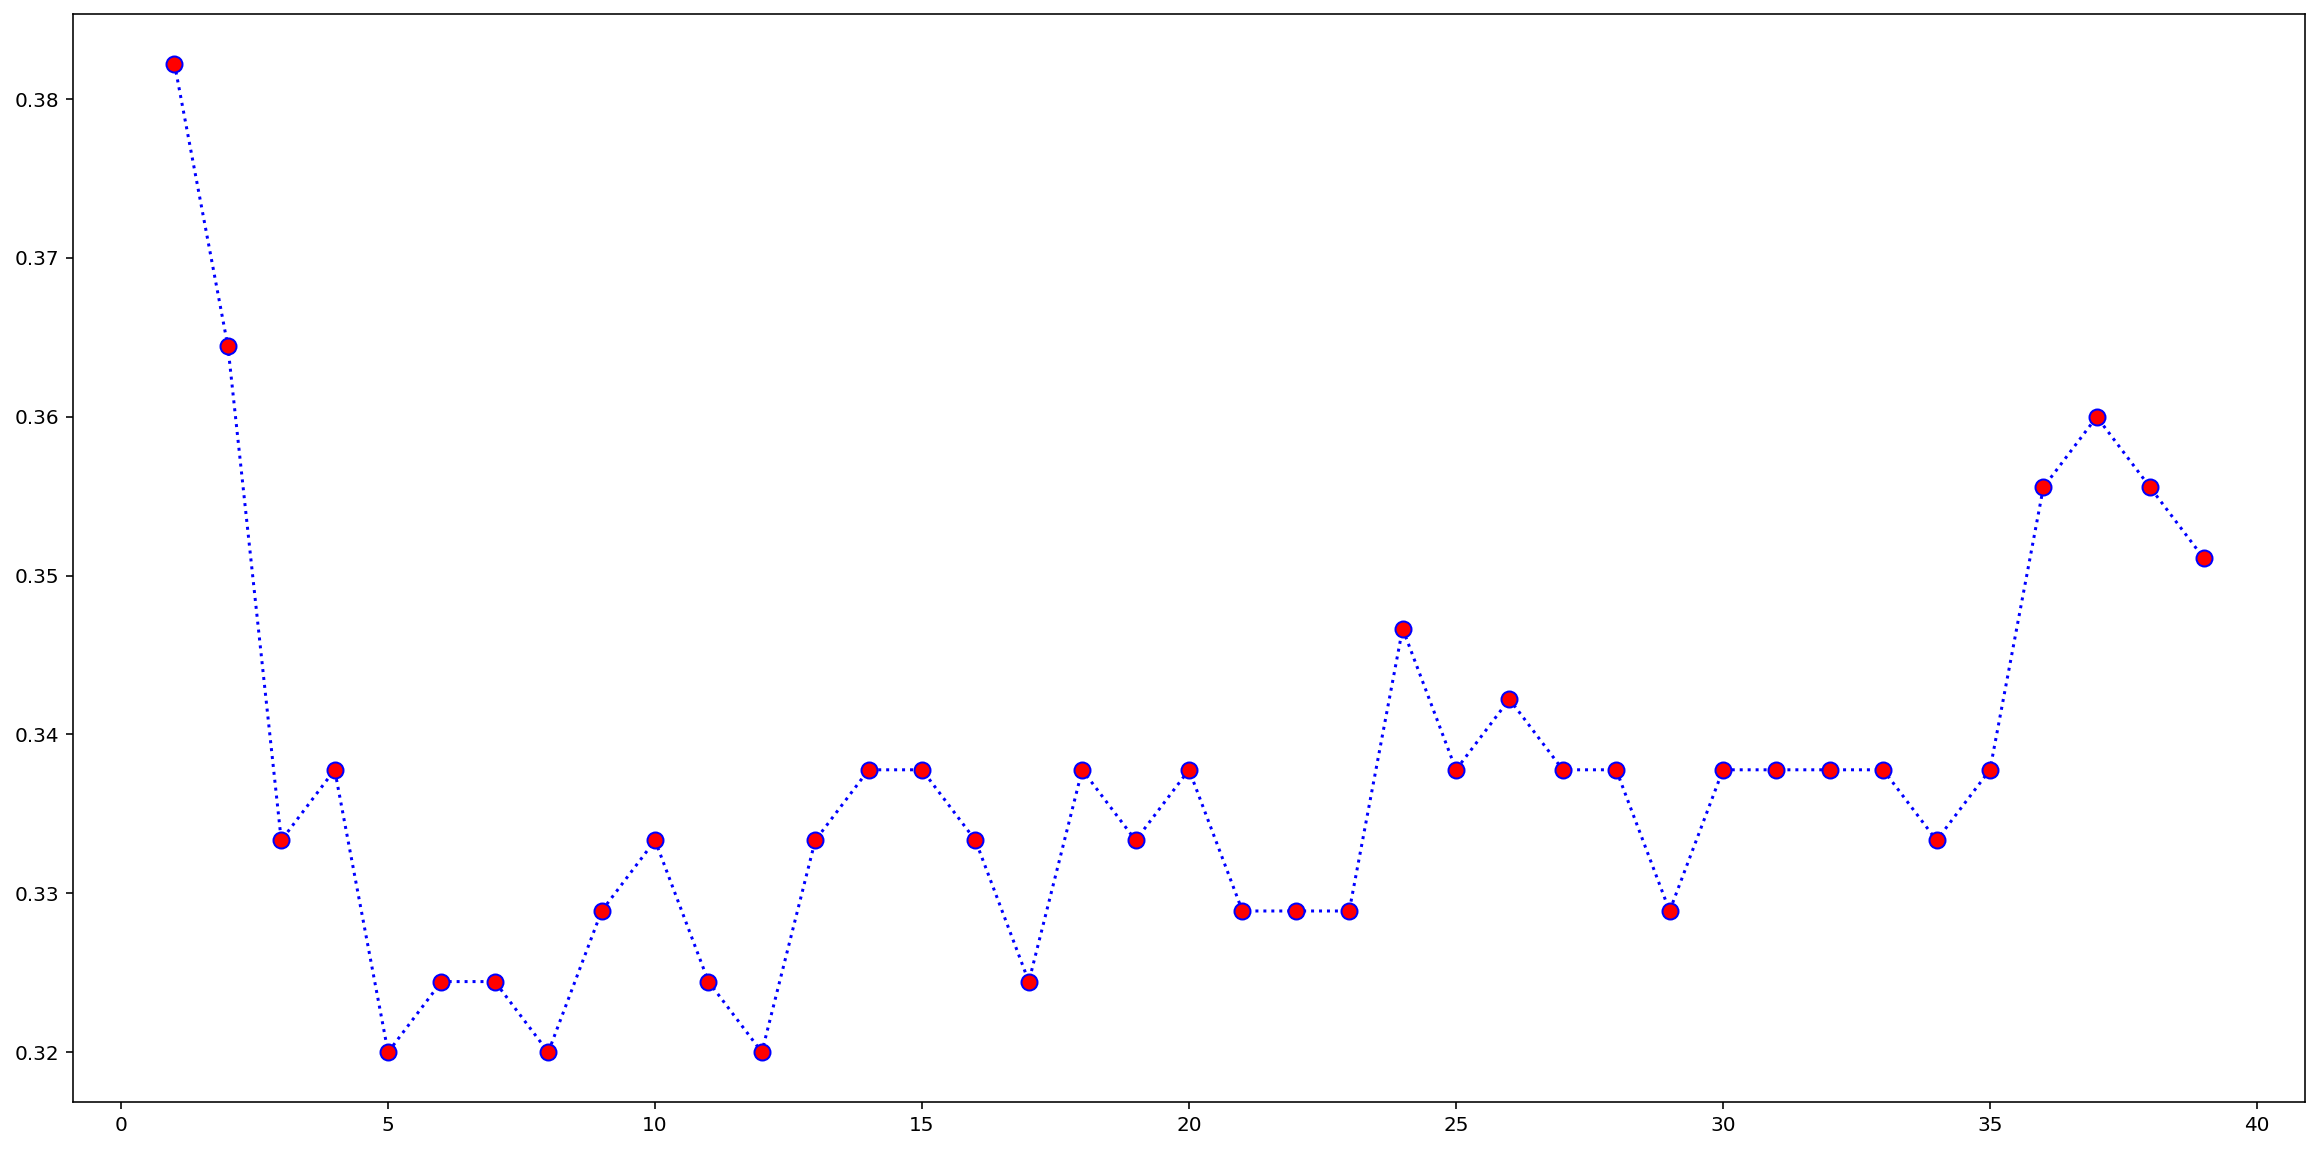

In [33]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
# Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel='K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

## XGB

In [34]:
le = LabelEncoder()
y = df['Class']
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    #random_state=train_test_split_params["random_state"],
                                                    shuffle=True)

- 0 = Behri 
- 1 = Deglet
- 2 = Dokol
- 3 = Iraqi
- 4 = Rotana
- 5 = Safavi
- 6 = Sogay

In [35]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

train_pred = xgb.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)
print('Train Accuracy: ', train_acc)
 
test_pred = xgb.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)
print('Test Accuracy:', test_acc)

Train Accuracy:  1.0
Test Accuracy: 0.8666666666666667


In [36]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00       115
           5       1.00      1.00      1.00       150
           6       1.00      1.00      1.00        65

    accuracy                           1.00       673
   macro avg       1.00      1.00      1.00       673
weighted avg       1.00      1.00      1.00       673



              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.67      0.67      0.67        24
           2       0.92      0.96      0.94        46
           3       0.71      0.62      0.67         8
           4       0.92      0.92      0.92        51
           5       1.00      0.96      0.98        49
           6       0.70      0.72      0.71        29

    accuracy                           0.87       225
   macro avg       0.82      0.81      0.82       225
weighted avg       0.87      0.87      0.87       225



<AxesSubplot:>

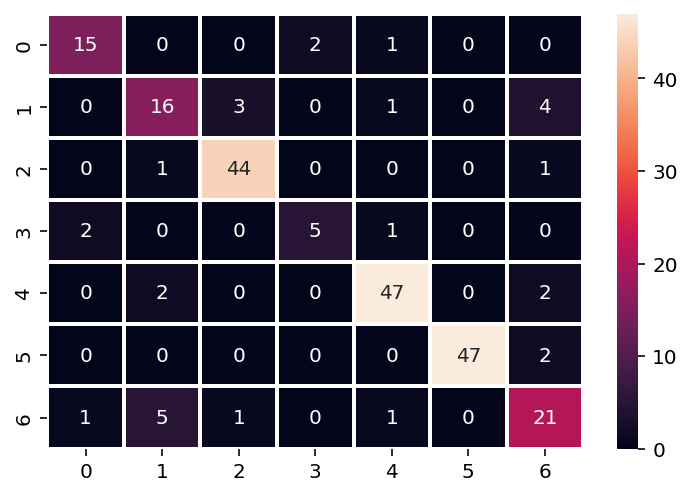

In [37]:
print(classification_report(y_test, xgb.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,xgb.predict(X_test)),annot=True,linewidths=2,linecolor='white')

In [38]:
y_pred = xgb.predict(X)
y_pred[:5]

array([0, 0, 0, 0, 0])

### Hyperparameter Tuning

In [39]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'eval_metric': ["mlogloss"],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [0, 3, 4]
        }

In [40]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1)

randomized_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=5, cv=skf.split(X_train,y_train), verbose=3, random_state=1)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weigh

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fbd74f71f50>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_c...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                      

In [41]:
print('Best hyperparameters:', randomized_search.best_params_)

Best hyperparameters: {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1.5, 'eval_metric': 'mlogloss', 'colsample_bytree': 0.6}


In [42]:
xgb = XGBClassifier(subsample = randomized_search.best_params_["subsample"],
                      min_child_weight = randomized_search.best_params_["min_child_weight"],
                      max_depth = randomized_search.best_params_["max_depth"],
                      learning_rate = randomized_search.best_params_["learning_rate"],
                      gamma = randomized_search.best_params_["gamma"],
                      eval_metric = randomized_search.best_params_["eval_metric"],
                      colsample_bytree = randomized_search.best_params_["colsample_bytree"])

In [43]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [44]:
train_pred = xgb.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)
print('Train Accuracy: ', train_acc)
 
test_pred = xgb.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)
print('Test Accuracy:', test_acc)

Train Accuracy:  0.9881129271916791
Test Accuracy: 0.8622222222222222


In [45]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.96      0.97      0.97        74
           2       0.98      0.99      0.99       158
           3       0.98      1.00      0.99        64
           4       1.00      0.99      1.00       115
           5       1.00      0.99      1.00       150
           6       0.98      0.97      0.98        65

    accuracy                           0.99       673
   macro avg       0.99      0.99      0.99       673
weighted avg       0.99      0.99      0.99       673



              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.62      0.62      0.62        24
           2       0.90      0.96      0.93        46
           3       0.64      0.88      0.74         8
           4       0.92      0.92      0.92        51
           5       1.00      0.96      0.98        49
           6       0.72      0.72      0.72        29

    accuracy                           0.86       225
   macro avg       0.82      0.83      0.82       225
weighted avg       0.87      0.86      0.86       225



<AxesSubplot:>

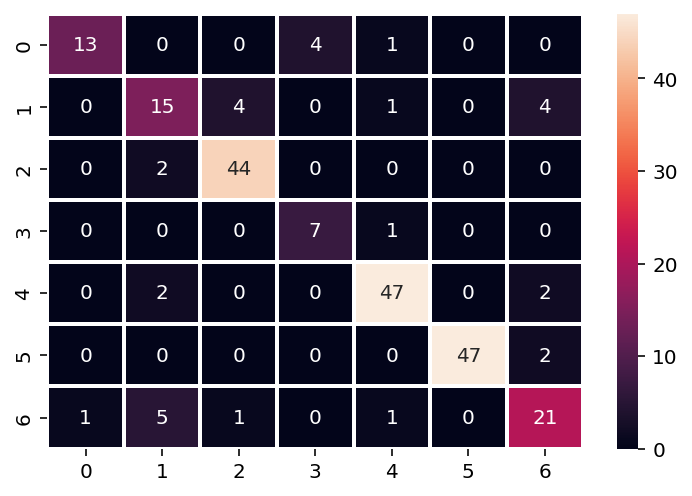

In [46]:
print(classification_report(y_test, xgb.predict(X_test)))
xgbpred = xgb.predict(X_test)
sns.heatmap(confusion_matrix(y_test,xgbpred),annot=True,linewidths=2,linecolor='white')

## Comparing all models by Lazy Classifier

In [47]:
!pip install lazypredict

In [48]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.41it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.90,0.87,None,0.90,0.19
LinearDiscriminantAnalysis,0.89,0.87,None,0.89,0.06
LogisticRegression,0.90,0.87,None,0.90,0.10
SVC,0.90,0.87,None,0.90,0.03
LabelPropagation,0.90,0.86,None,0.90,0.08
LabelSpreading,0.90,0.86,None,0.90,0.09
CalibratedClassifierCV,0.89,0.85,None,0.88,0.54
SGDClassifier,0.88,0.85,None,0.88,0.10
ExtraTreesClassifier,0.88,0.84,None,0.88,0.20


In [49]:
for i in predictions.columns.tolist():
    print('\t\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

		 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        24
           2       0.77      0.93      0.84        46
           3       1.00      0.25      0.40         8
           4       0.64      0.80      0.71        51
           5       1.00      0.96      0.98        49
           6       0.48      0.93      0.64        29

    accuracy                           0.71       225
   macro avg       0.56      0.55      0.51       225
weighted avg       0.62      0.71      0.64       225
 

		 BaggingClassifier 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.54      0.62      0.58        24
           2       0.89      0.91      0.90        46
           3       0.70      0.88      0.78         8
           4       0.92      0.94      0.93        51
           5       1.00      

# Thank You!